# Estudio sobre accidentes aéreos #

Se va a realizar un estudio sobre un dataset que contiene distintos accidentes de avión desde 1908, incluyendo etapas en las que la aviación era puramente militar ya que eran periodos de guerra.
Primero, se van a cargar los datos:

In [1]:
import pandas as pd
df = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv", sep = ",")
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


En un primer vistazo se observa una gran cantidad de nulos en distintas columnas. Es importante conocer cuantos nulos hay por variable y en que porcentaje, sobre todo a la hora de tenerlo en cuenta para análisis posteriores:

In [2]:
print("Cantidad de nulos: ")
print(df.isnull().sum())
print("-----------")
print("Porcentaje de nulos: ")
print(df.isnull().sum()/len(df) * 100)

Cantidad de nulos: 
Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64
-----------
Porcentaje de nulos: 
Date             0.000000
Time            42.122248
Location         0.379651
Operator         0.341686
Flight #        79.707669
Route           32.384207
Type             0.512528
Registration     6.359150
cn/In           23.310554
Aboard           0.417616
Fatalities       0.227790
Ground           0.417616
Summary          7.403189
dtype: float64


Las variables que más porcentaje de nulos tienen son: el número de vuelo, la hora a la que se produjo el accidente y la ruta que seguía el avión. Por lo tanto a la hora de realizar análisis hay que tener sumo cuidado con las variables que se utilizan. Afortunadamente existe una variable (Date) que no contiene ningún nulo, por lo que puede servir para ordenar los distintos datos. El tipo de avión, el número de muertes o la localización del accidente son variables con muy pocos nulos que pueden servir de utilidad.

## Accidentes en el tiempo ##

El primer análisis que se puede ocurrrir es el de observar el número de accidentes a lo largo del tiempo, teniendo en cuenta ciertos contextos históricos (como las guerras). Para ello se agrupan los accidentes por años y se muestra su serie temporal:

In [3]:
def obtenerYear(fecha):
    return int(fecha.split("/")[2])
df["year"] = df["Date"].apply(lambda x: obtenerYear(x))

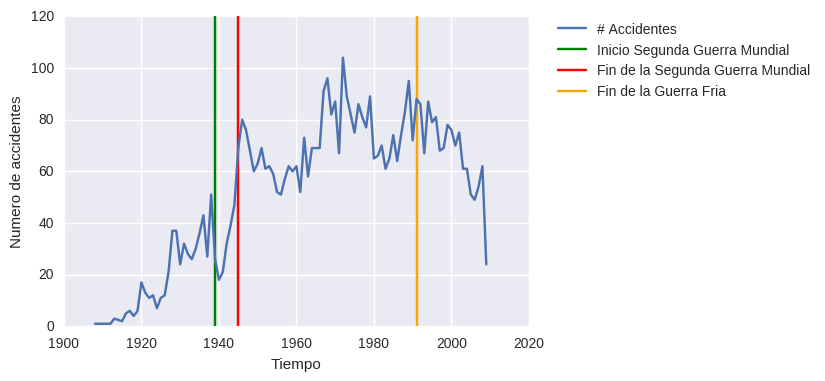

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
evolution_crashes = df[["year", "Date"]].groupby("year").count()
plt.plot(evolution_crashes)
plt.vlines(1939, 0, 120, colors="green")
plt.vlines(1945, 0, 120, colors="red")
plt.vlines(1991, 0, 120, colors="orange")
plt.legend(["# Accidentes", "Inicio Segunda Guerra Mundial", "Fin de la Segunda Guerra Mundial", 
            "Fin de la Guerra Fria"], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Tiempo")
plt.ylabel("Numero de accidentes")

La gráfica muestra que el número de accidentes ha incrementado en el tiempo, excepto a partir del siglo XXI que ha comenzado a decrecer. Las razones de este comportamiento pueden ser las siguientes:
* Expansión del tráfico aéreo: A medida que avanzan los años, el tráfico aéreo es más abundante debido a los avances tecnológicos y a que cada vez más países disponen de líneas aéreas. Se puede plantear que, cuantos más aviones en activo existan, más accidentes de avión pueden ocurrir.
* Avances tecnológicos:
    * En los primeros momentos de la aviación, existían pocos aviones en activo y los que había no disponían de grandes medidas de seguridad, por lo que crece relativamente rápido el número de accidentes. Los primeros aviones generalmente son de carácter militar.
    * Con el paso del tiempo, comienzan a surgir los aviones comerciales y civiles (con pasajeros), a la vez que incrementan los aviones militares. El tráfico aéreo comienza a ser ocupado muy rápidamente mientras que las medidas de seguridad no crecen a ese mismo ritmo. Esto provoca que el número de accidentes continúe creciendo pero a un ritmo más elevado. 
    * En las últimas décadas el tráfico aéreo continúa expandiéndose pero las medidas y protocolos de seguridad han mejorado sustancialmente tanto para aviones militares como para aviones civiles o mercantiles, por lo que se experimenta una notable bajada en el número de accidentes.
* Contexto histórico: guerras. La subida más notable se encuentra en el trancurso de la segunda guerra mundial, como se indica en el gráfico. Esta subida se debe a todos los aviones militares destruidos o accidentados, y a la creación masiva de más aviones para compensar las pérdidas. Sin embargo, tras la segunda guerra mundial se anuncia la posterior guerra fría, que, aunque no provocase una guerra de forma explícita, si que se seguían sucediendo accidentes. Con el fin de la guerra fría, acercándose al siglo XXI, en periodo de paz los accidentes comienzan a descender.

## Analizando por tipo de avión ##

Ahora que se ha realizado un vistazo general de los accidentes a lo largo del tiempo, se propone ahondar en los diferentes tipos de avión a la hora de tener en cuenta los accidentes. Primero, se observarán las frecuencias de los accidentes por tipo de avión, para ver si sigue una distribución conocida:

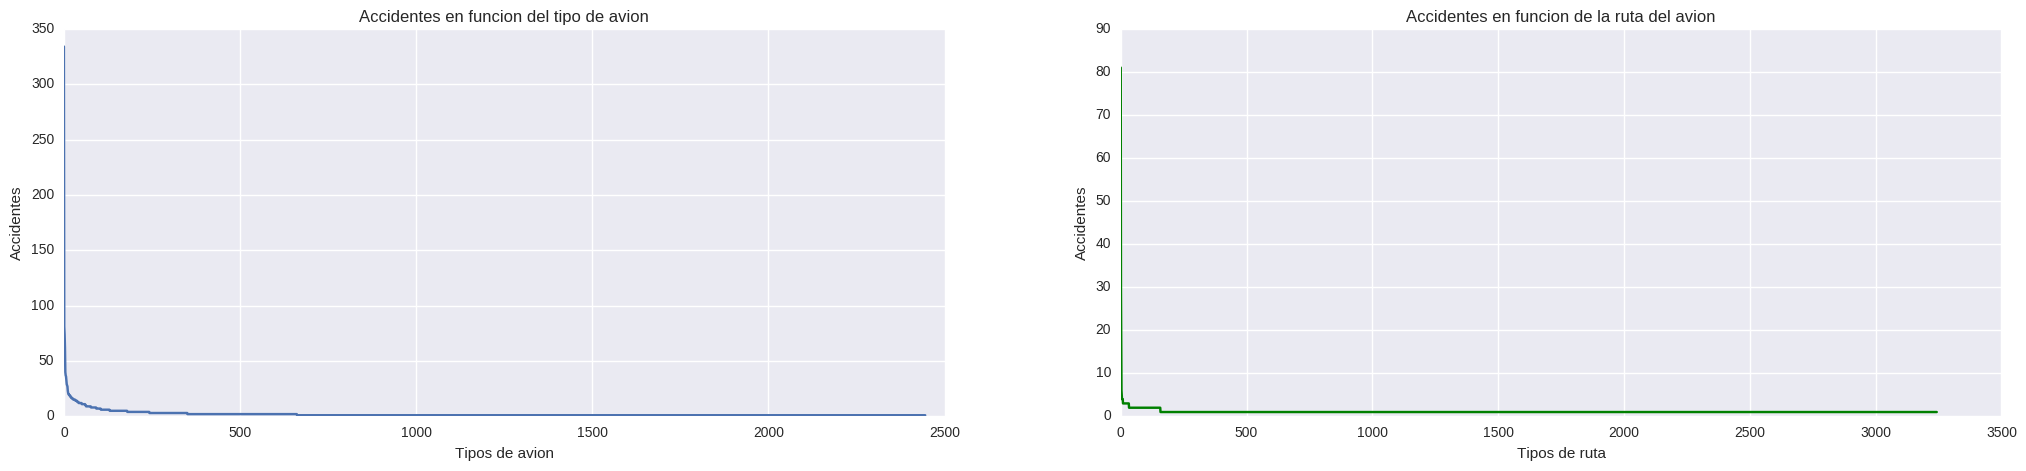

In [15]:
plt.figure(figsize=(25,5))
plt.subplot(121)
crashes_type = df[["Type","Date"]].groupby("Type").count().sort_values("Date", ascending = False)
plt.plot(range(0, len(crashes_type)), crashes_type["Date"])
plt.xlabel("Tipos de avion")
plt.ylabel("Accidentes")
plt.title("Accidentes en funcion del tipo de avion")
plt.subplot(122)
crashes_route = df[["Route","Date"]].groupby("Route").count().sort_values("Date", ascending = False)
plt.plot(range(0, len(crashes_route)), crashes_route["Date"], color = "green")
plt.xlabel("Tipos de ruta")
plt.ylabel("Accidentes")
plt.title("Accidentes en funcion de la ruta del avion")

Vistas las distribuciones, se puede decir que siguen una distribución de Pareto, en la que el 80% de los casos lo contienen el 20% de los datos.

Sabiendo que existes ciertos tipos de avión con grandes cantidades de accidentes, se va a buscar cuáles son, teniendo en cuenta tanto el número de accidentes como el número de muertes que supusieron esos accidentes:

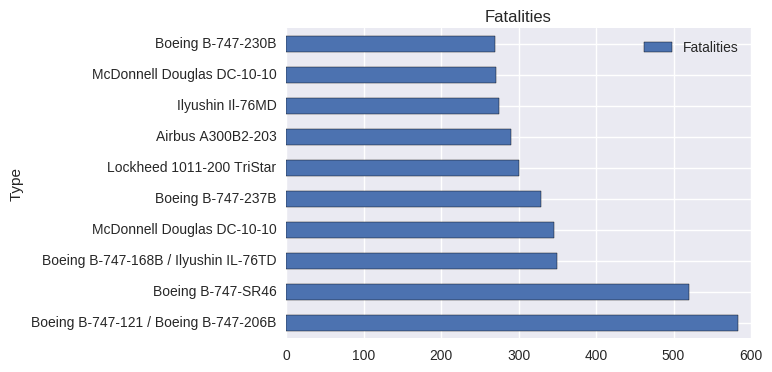

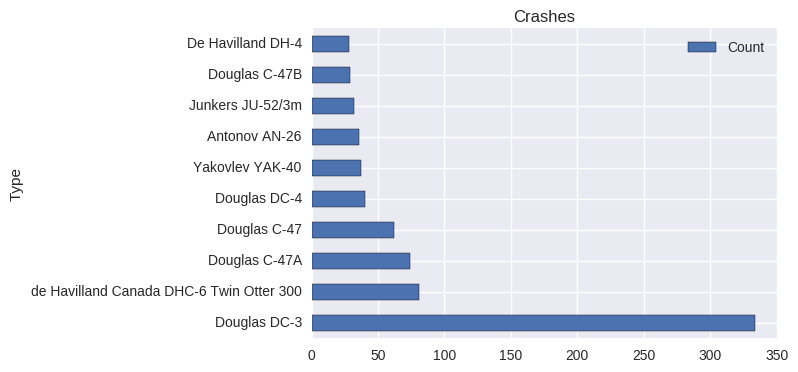

In [22]:
fatalities = df[["Fatalities","Type"]].sort_values("Fatalities", ascending = False).head(10)
fatalities.plot("Type", "Fatalities", kind="barh", title="Fatalities")

crashes_type2 = df[["Type","Date"]].groupby("Type").count()
crashes_type2["Count"] = crashes_type2["Date"]
crashes_type2 = crashes_type2.sort_values("Count", ascending=False).head(10)
crashes_type2.plot(y="Count", kind="barh", title="Crashes")

Se puede ver que el número de muertes está a una escala diferente que el número de accidentes (debido a que hay accidentes que suponen más de una muerte). En cuanto a número de muertes, el reparto es más "equitativo", habiendo solo dos tipos de avión punteros, mientras que el resto es más uniforme. Esto no pasa con el número de accidentes, donde el "Douglas DC-3" es el avión que más cantidad de accidentes tiene, muy por encima del siguiente. 

Este análisis no será completo si no se trata de separar los aviones militares de los aviones civiles, para ver si existe gran diferencia:

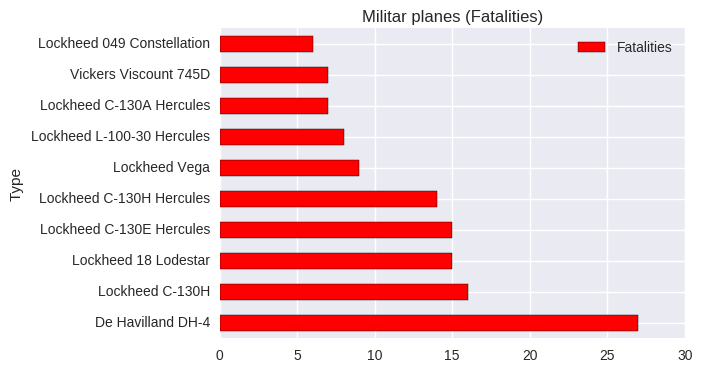

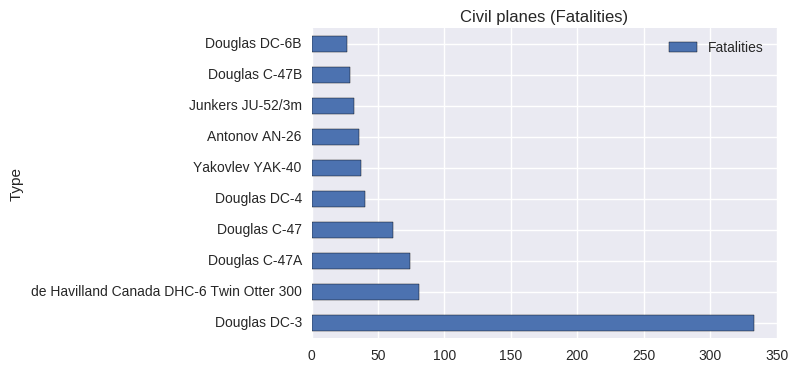

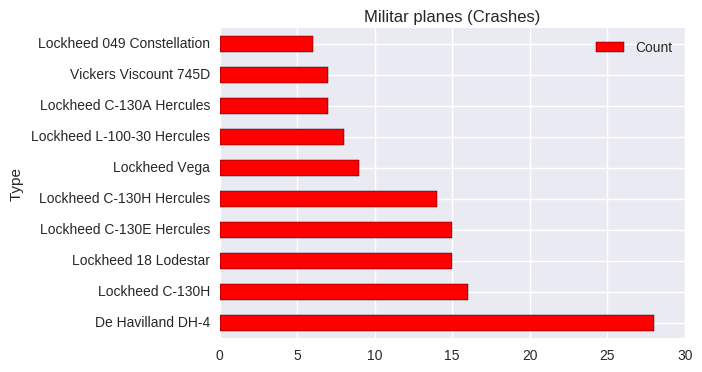

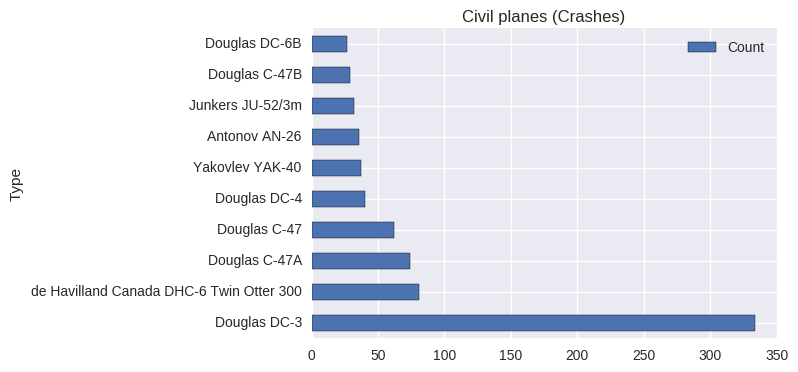

In [23]:
militares = ["Lockheed", "Bell UH", "Boeing F18", "Boeing AH64", "Sukhoi", "Blériot", "Vickers", "Sopwith",
          "DH4", "DH-4"]

def esMilitar(nombreAvion):
    for i in militares:
        if i in str(nombreAvion):
            return True
    return False

df["Militar"] = df["Type"].apply(lambda x: esMilitar(x))

military_fat = df[df["Militar"] == True][["Type","Fatalities"]].dropna()
military_fat = military_fat.groupby("Type").count().sort_values("Fatalities", ascending = False).head(10)
military_fat.plot(y = "Fatalities", kind="barh", title="Militar planes (Fatalities)", color = "red")

civil_fat = df[df["Militar"] == False][["Type","Fatalities"]].dropna()
civil_fat = civil_fat.groupby("Type").count().sort_values("Fatalities", ascending = False).head(10)
civil_fat.plot(y = "Fatalities", kind="barh", title = "Civil planes (Fatalities)")

military_crash = df[df["Militar"] == True][["Type","Date"]].groupby("Type").count()
military_crash["Count"] = military_crash["Date"]
military_crash = military_crash.sort_values("Count", ascending=False).head(10)
military_crash.plot(y="Count", kind="barh", title="Militar planes (Crashes)", color = "red")

civil_crash = df[df["Militar"] == False][["Type","Date"]].groupby("Type").count()
civil_crash["Count"] = civil_crash["Date"]
civil_crash = civil_crash.sort_values("Count", ascending=False).head(10)
civil_crash.plot(y="Count", kind="barh", title="Civil planes (Crashes)")

Gracias a esta clasificación, se puede ver que el avión "Douglas DC-3" es el que más accidentes y muertes tiene, muy por encima de sus seguidores, y que el reparto más equitativo de accidentes y muertes se lleva a cabo en aviones de corte militar, siendo el "De Havilland DH-4" el que más tiene en ambas categorías.

## Analizando descripciones ##

Otro aspecto que no se ha tenido en cuenta es que para accidente existe una descripción que otorga mayor información (el campo solo tiene 7.4% de nulos). Un análisis interesante puede ser la diferencia de muertes que supone un accidente por explosión. Si se buscan referencias a una explosión dentro de las descripciones, se podrá categorizar los tipos de accidentes:

In [24]:
def explosion(summary):
    return "explosion" in summary

df["Explosion"] = df["Summary"].dropna().apply(lambda x: explosion(x))
explosion = df[df["Explosion"] == True]
noExplosion = df[df["Explosion"] == False]
print("Media fallecidos por explosion: " + str(explosion["Fatalities"].mean()))
print("Media fallecidos por razones que no son explosion: " + str(noExplosion["Fatalities"].mean()))

Media fallecidos por explosion: 30.8301886792
Media fallecidos por razones que no son explosion: 20.9356579494


Aquí se ha realizado un análisis puramente descriptivo, obteniendo la medai de fallecidos por explosión o por otra causa. Se corrobora que los accidentes con explosión suponen más muertes que los accidentes por otras causas. 

Este análisis se puede hacer con un test estadístico comparando ambas medias, y si el valor obtenido es menor que un límite impuesto (será de 0.05), informará si existe diferencia entre ambas medias. Un test estadístico ideal para estos casos puede ser el T-Student:

In [25]:
from scipy import stats
ts, p = stats.ttest_ind(explosion["Fatalities"].dropna(), noExplosion["Fatalities"].dropna())
print(p)
print "Difference!" if p < 0.05 else "No difference"

0.0361760919157
Difference!


Informando de que, efectivamente, existe diferencia entre accidentes con explosión o sin explosión.